# Pytorch workflow

let's explore an example ptroch end-to-end workflow.

resources = https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

https://www.learnpytorch.io/01_pytorch_workflow/

ask questions = https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
import pathlib

what_were_covering = {
    1: "data prep and load",
    2: "bulid and train model",
    3: "fitting the model to data (training)",
    4: "saving and loading the model",
    5: "putting it all together"
}

what_were_covering

{1: 'data prep and load',
 2: 'bulid and train model',
 3: 'fitting the model to data (training)',
 4: 'saving and loading the model',
 5: 'putting it all together'}

In [4]:
nvcc --version

NameError: name 'nvcc' is not defined

In [201]:
import torch
from torch import nn, optim  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.4.1+cu124'

# 1. Data prep and loading

Dat acan be almost anything.. in ML
- Excel spreasheets
- images of any kind
- Videos (yt has a lot of data)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of 2 parts :
1. get data into numerical representation
2. Build a model to learn patterns in that numerical representation

to showcase this, lets create some *known* data using the LinReg formula.

we'll use a linear regerssion formula to make a straight line with *known* **parameters**

In [202]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [203]:
len(X), len(y)

(50, 50)

### Splittin data into training and test data (one of the most important concepts in ML general)

lets create a training and test set with our data

In [204]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [205]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot predictions in red (predictions in green aren't ideal)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size": 14});

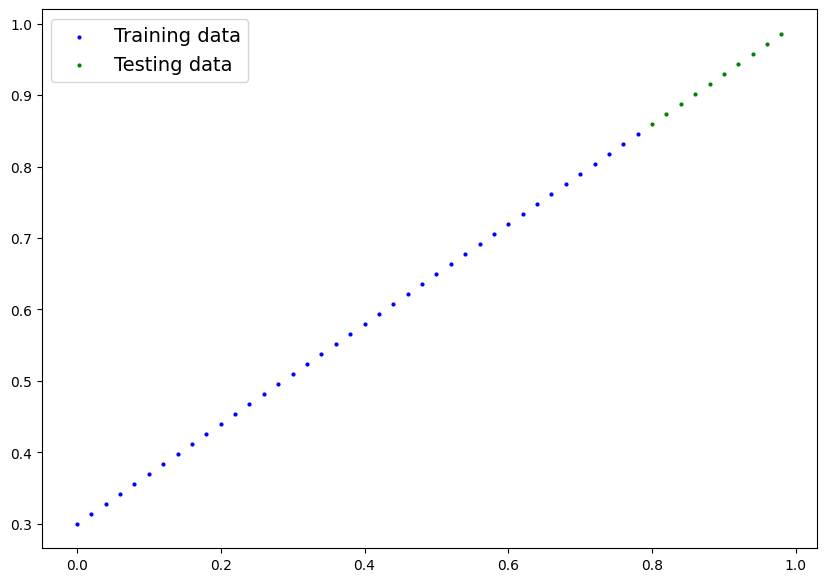

In [206]:
plot_predictions()

In [207]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

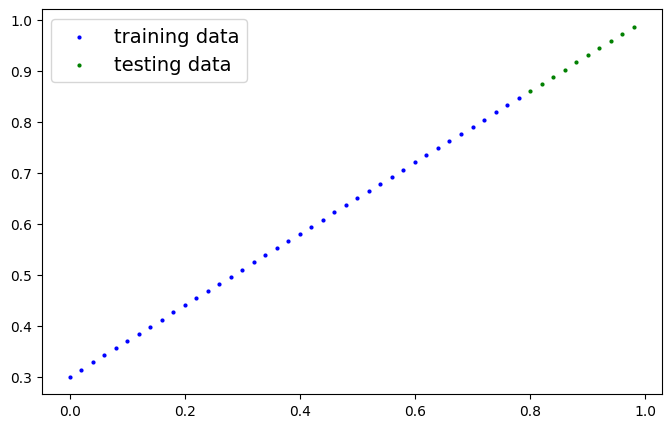

In [208]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c="b", s=4, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")
plt.legend(prop={"size": 14})

## 2. Build model

Our first pytorch model

Because we're going to building classes troughout the course, i'd recommend getting familiar with OOP in python, to do so you can use the following resource from Real Python : https://realpython.com/python-classes/

What the model does :
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it so?

Through this 2 main algo:
- Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w&pp=ygUcM2JsdWUxYnJvd24gZ3JhZGllbnQgZGVzY2VudA%3D%3D
- Backpropagation -

In [209]:
# Create a linreg model class
class LinRegModelV1(nn.Module):# <- almost everything in pytorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                        requires_grad=True, # <- can we update this value with gradient descent?
                                        dtype=torch.float)) # <- data type of values inside the tensor
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                        requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- Pytorch loves the datatype torch.float32

    #Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (also called the features)
    return self.weights * x + self.bias # this is the linreg formula

## Pytorch model building essentials
- torch.nn - containes all of the buildings for computational graphs (a neural network can be considered a computational graph)
- torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- torch.nn.Module - The base class for all nn modules, if you subclass it, you sould overwrite forward()
- torch.optim - this where the optimizers in pytorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

pytorch cheadsheet = https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contenst of or pytorch model

Now weve created a model, lets see whats inside...

So we can check our model parameters or whats inside our model using `.parameters()`

In [210]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinRegModelV1()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [211]:
# List named parameters

model_0.state_dict(
)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predicton using `torch.inference_mode()`

to check our models predictive power, let see how well it predicts `y_test` based on `X_test`.

when we pass data through our model, it's going to run it through the `forward()` method.

In [212]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [213]:
# make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)

# we can also do seomthing similar with torch.no_grad(), however, torch.inference_mode() is preffered
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [214]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

inference mode -- https://x.com/PyTorch/status/1437838231505096708

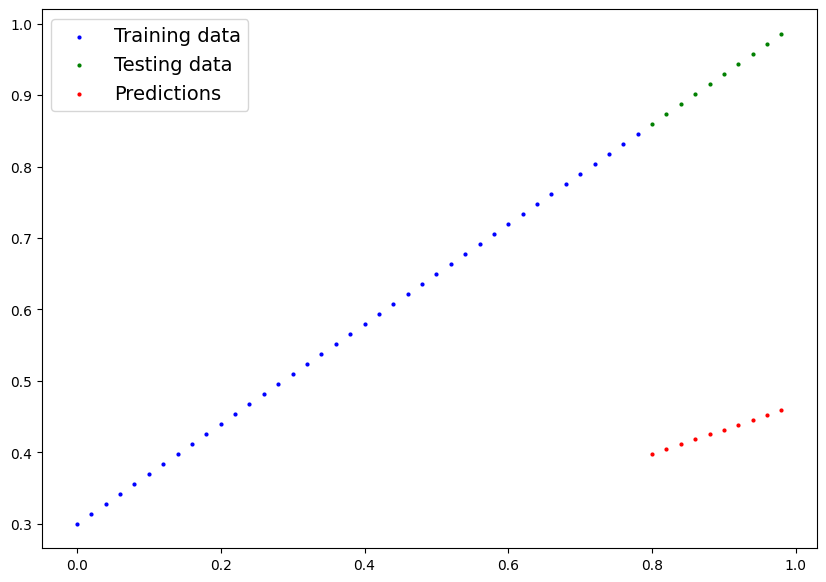

In [215]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of this training is for a model to move from some *unknown* parameters (these maybe be random) to some known parameters
    
Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function

* note : loss function may alo be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Thins we need to train :

* **loss function :** A function to meassure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer :** Takes into account the loss of a model and adjusts the model's parameters (e.g weight & bias) to improve the loss function -> https://pytorch.org/docs/stable/optim.html
    * Iniside the optimizer you'll often have to set 2 parameters:
        * `params` - the model parameters you'd like to optimize, for example `model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` result in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [216]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [217]:
# check out the model parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [218]:
# set up a loss function
loss_fn = nn.L1Loss()

# set up an opptimizer
optimizer = optim.SGD(params=model_0.parameters(),
                      lr=0.01) # learning rate = possibly the most important hyperparameter you can set

In [219]:
loss_fn

L1Loss()

**Q** : Which loss function and optimizer should i use?
**A** : This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like this), a loss function of `nn.Loss()` and an optimizer like `torch.optim.SGD()` will suffice
But for a classfication problem like classifying whether a photo is a dog or cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss) 

### Building a training loop (and testing loop) in PyTorch

A couple things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards throuh the network to calculate the gradients of each of parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss (**gradient descent**)

In [220]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [221]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [222]:
# A epoch is a loop through the data... (this is a hyperparameter because set it ourselves)
torch.manual_seed(42)

epochs = 200

#track different values
epoch_count = []
lost_values = []
test_loss_values = []

#Training
# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients
    
    # 1. Forward passs
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train)
    print(f"Loss : {loss}")
    
    # 3. Optimizer seero grad
    optimizer.zero_grad()
    
    # 4. Perform backprop on the loss with respect to parameters to the model
    loss.backward()
    
    # 5. Step theoptimizer (perform gradient descent)
    optimizer.step() #by default how the optimizer changes will accumulate through the loop so.. we have to zero them above insetp 3 form the next iteration of the loop
    
    #testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
        #1. forward pass
        test_pred = model_0(X_test)
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    #print out whats happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        lost_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epochs : {epoch} | Loss : {loss} | Test Loss: {test_loss}")
    
    print(model_0.state_dict())
    

Loss : 0.31288138031959534
Epochs : 0 | Loss : 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss : 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss : 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss : 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss : 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss : 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss : 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss : 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss : 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss : 0.20919232070446014
Ord

In [223]:
import numpy as np
np.array(torch.tensor(lost_values).cpu().numpy()), lost_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039,

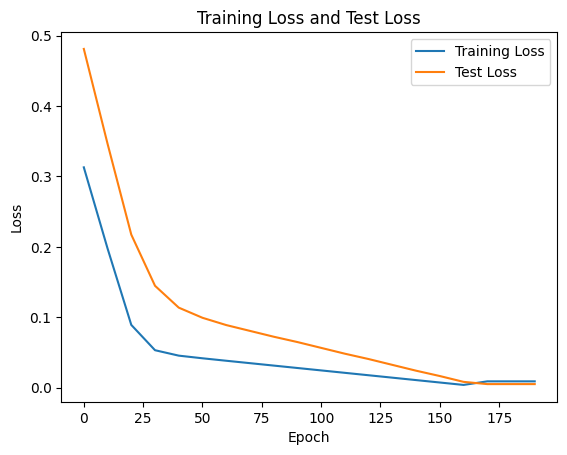

In [224]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(lost_values).numpy()), label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training Loss and Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [225]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [226]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [227]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [228]:
weight, bias

(0.7, 0.3)

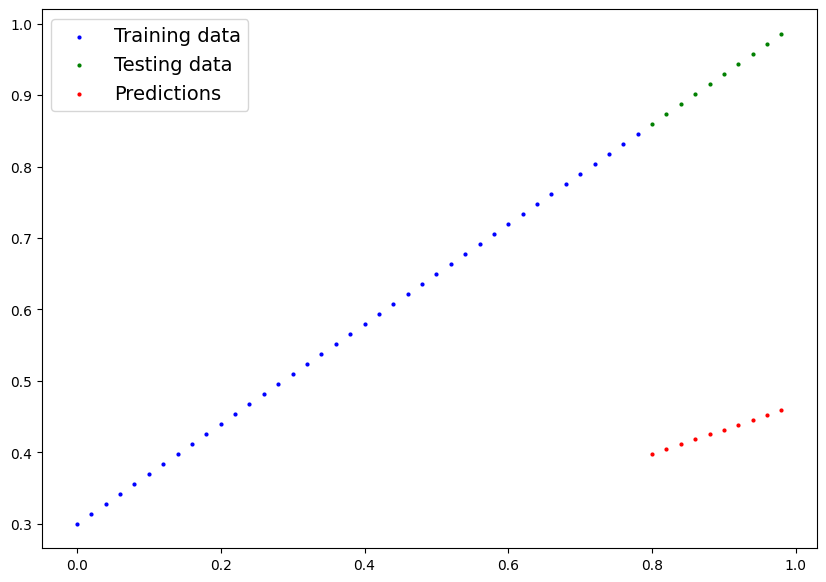

In [229]:
plot_predictions(predictions=y_preds)

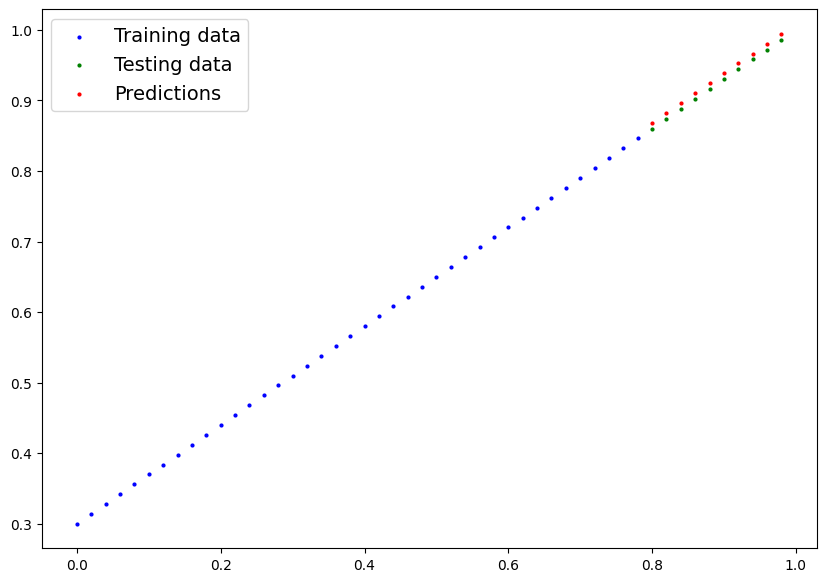

In [230]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTroch

They are 3 main methods you should about for saving and loading models in PyTorch
1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load to a model's saved state dictionary

PyTorch save & load code tutorial :  https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [231]:
# saving PyTorch model
from pathlib import Path

model_0.state_dict()

# 1. create models durectory
MODEL_PATH = Path("../Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model savepath
MODEL_NAME = '01_Pytorch_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : ..\Models\01_Pytorch_workflow.pth


## 6. Putting it all together

let's go back through the steps above and see it all in one place

In [232]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#check pytroch version
torch.__version__

'2.4.1+cu124'

create device-agnostic code

this means if we've got access to a GPU, out code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU

In [233]:
# set up device agnostic code
devive = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {devive}")

using device : cuda


In [234]:
!nvidia-smi

Sat Nov  2 00:27:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              9W /   35W |     124MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data

In [235]:
# create some data using the LR formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Cerate random values
start = 0
end = 1
step  = 0.02

#create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [236]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

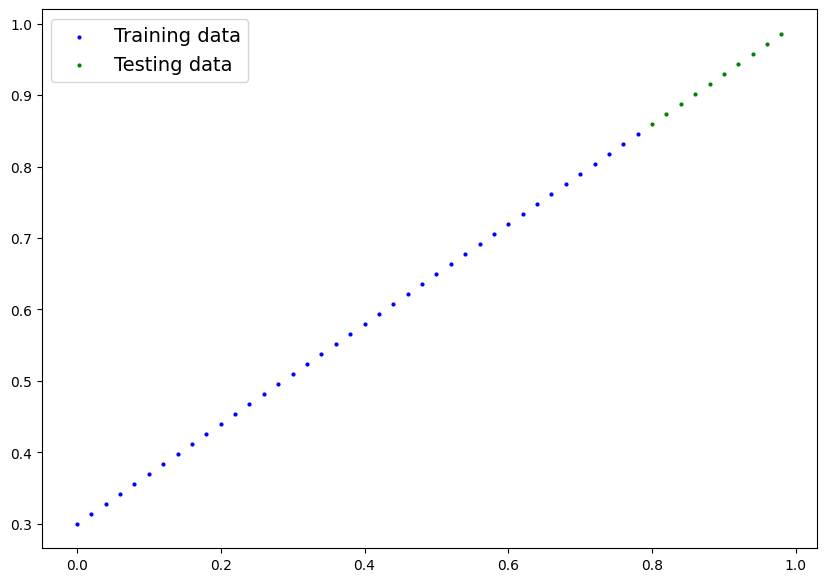

In [237]:
# PLot the data 
# Note : if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Bulding a PyTorch Linear model


In [238]:
# create a lin model by subclassing nn module
class Linreg2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.linear() for creating the model parameters / also called : linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
#set the manual seed
torch.manual_seed(42)
model_1 = Linreg2()
model_1, model_1.state_dict()

(Linreg2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [239]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [240]:
# Set the model to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [241]:
model_1.to(devive)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [242]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

## 6.3 Training

for training we need : 
* loss function
* opt
* training loop
* testing loop

In [243]:
# set up loss function

loss_func = nn.L1Loss()

#set up opt
optimizer = optim.SGD(params=model_1.parameters(), lr = 0.01)



In [244]:
#write a training loop
torch.manual_seed(42)

epochsss = 200

# put data on the target device (device agnostic code for data)
X_train = X_train.to(devive)
X_test = X_test.to(devive)
y_train = y_train.to(devive)
y_test = y_test.to(devive)

for epoch in range(epochsss):
    model_1.train()
    
    #1. do the forward pass
    y_predd = model_1(X_train)
    
    #2. calculate the loss
    loss = loss_func(y_predd, y_train)
    
    #3. Opti zero grad
    optimizer.zero_grad()
    
    #4. perform backprop
    loss.backward()
    
    #5. opti step
    optimizer.step()
    
    ### testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_func(test_pred, y_test)
        
    #Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Test Loss: {test_loss}")

Epoch : 0 | Loss : 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch : 10 | Loss : 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch : 20 | Loss : 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch : 30 | Loss : 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch : 40 | Loss : 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch : 50 | Loss : 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch : 60 | Loss : 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch : 70 | Loss : 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch : 80 | Loss : 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch : 90 | Loss : 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch : 100 | Loss : 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch : 110 | Loss : 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch : 130 | Loss : 0.0012645035749301314 | 

In [245]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

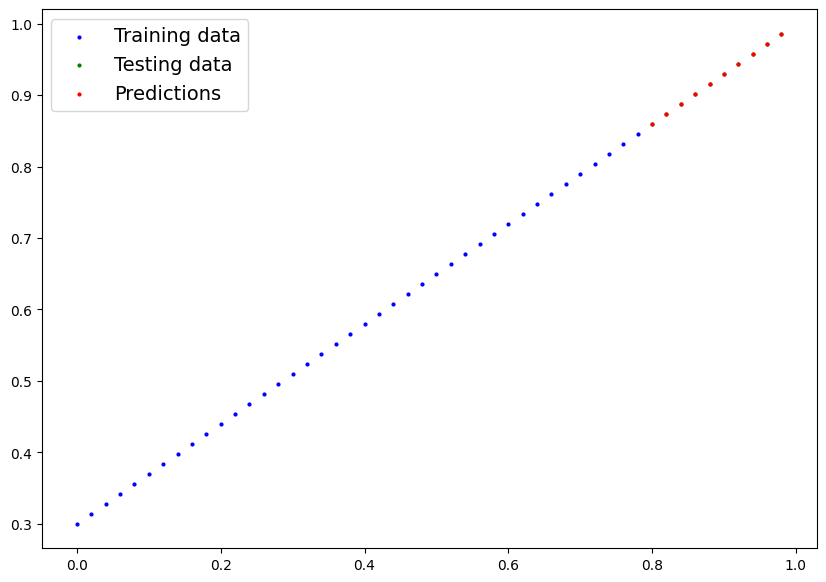

In [246]:
X_train_cpu = X_train.detach().cpu().numpy()
X_test_cpu = X_test.detach().cpu().numpy()
y_train_cpu = y_train.detach().cpu().numpy()
y_test_cpu = y_test.detach().cpu().numpy()
test_pred_cpu = test_pred.detach().cpu().numpy()

plot_predictions(train_data=X_train_cpu,
                 train_labels=y_train_cpu,
                 test_data=X_test_cpu,
                 test_labels=y_test_cpu,
                 predictions=test_pred_cpu)

In [248]:
# 6.5 saving and loading a trained model
model_1.state_dict()

latihan_model_path = Path("../Models")
latihan_model_path.mkdir(parents=True, exist_ok=True)

nama_model = 'eak model.pth'
nama_simpen_model = latihan_model_path/nama_model

print(f"Saving model to : {nama_simpen_model}")
torch.save(obj=model_1.state_dict(), f=nama_simpen_model)

Saving model to : ..\Models\eak model.pth


In [249]:
# load a PyTorch model

# create an instance of linreg2
ngambil_model = Linreg2()

# load the model model_1 state dict
ngambil_model.load_state_dict(torch.load(nama_simpen_model))

# put the target / loaded model to device
ngambil_model.to(devive)

C:\Users\diyan\AppData\Local\Temp\ipykernel_18380\1956801586.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ngambil_model.load_state_dict(torch.load(nama_simpen_model))

Linreg2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [250]:
next(ngambil_model.parameters()).device

device(type='cuda', index=0)

In [251]:
ngambil_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [252]:
# evaluate loaded model
ngambil_model.eval()
with torch.inference_mode():
    preds_ngambil_model_1 = ngambil_model(X_test)
test_pred == preds_ngambil_model_1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & extra curriculum 

https://www.learnpytorch.io/01_pytorch_workflow/



In [6]:
import numpy as np
#testing on linux env

In [1]:
#testing for the second time